<a href="https://colab.research.google.com/github/RheyMartt/CCMACLRL_EXERCISE_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [17]:
df = pd.read_excel('./personality.xlsx')
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Alice,1,1,1,500,1
1,Bob,0,0,0,150,0
2,Carol,1,1,0,800,1
3,Dave,0,1,1,300,0
4,Eve,1,0,0,200,0


1. Display the summary of all the features of the dataset using `.info()`

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [21]:
df['Personality'].value_counts()

,count
Personality,
1,27
0,23


In [22]:
for col in df.columns:
    print(col, df[col].unique())
    print()

Name ['Alice' 'Bob' 'Carol' 'Dave' 'Eve' 'Frank' 'Grace' 'Henry' 'Irene' 'Jack'
 'Karen' 'Larry' 'Mona' 'Nancy' 'Oscar' 'Paula' 'Quinn' 'Rachel' 'Steve'
 'Tina' 'Uma' 'Victor' 'Wendy' 'Xavier' 'Yolanda' 'Zack' 'Amy' 'Brian'
 'Clara' 'Dennis' 'Elsa' 'Fred' 'Gina' 'Harry' 'Isabel' 'James' 'Kelly'
 'Leo' 'Mary' 'Noah' 'Olivia' 'Paul' 'Rose' 'Sam' 'Walter' 'Zoe']

Post/Share Frequently? [1 0]

Active in social media? [1 0]

Replies to comments? [1 0]

Number of friends/followers [500 150 800 300 200 700 350 900 100 450 250 600 550 650 400]

Personality [1 0]



In [23]:
df_noname = df.drop(['Name'], axis=1)
df_noname.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,500,1
1,0,0,0,150,0
2,1,1,0,800,1
3,0,1,1,300,0
4,1,0,0,200,0


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [24]:
X = df_noname.drop(['Personality'], axis=1).values

y = df_noname['Personality'].values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

^^^^^^^^^^

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 4) (10, 4) (40,) (10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

7. Train the model using the `.fit()`

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

8. Test the model using the `.predict()`

In [28]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

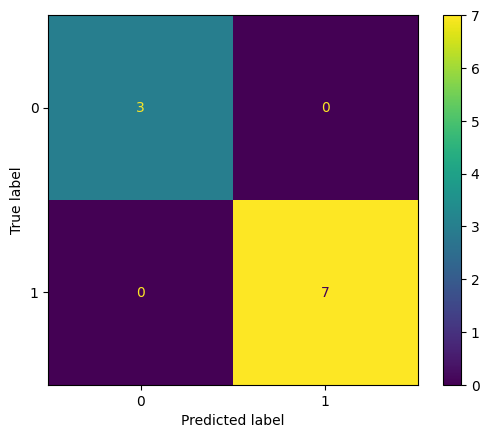

In [30]:
confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=knn.classes_), display_labels=knn.classes_)
disp.plot()
plt.show()

10. Display the accuracy

In [31]:
metrics.accuracy_score(y_test, y_pred)

1.0

11. Display the precision

In [32]:
precision_score(y_test, y_pred, average=None)

array([1., 1.])

12. Display the recall

In [33]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([1., 1.])

13. Display the f1-score

In [34]:
f1 = f1_score(y_test, y_pred, average=None)
f1

array([1., 1.])